In [0]:
from google.colab import files
uploaded = files.upload()

In [0]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [2]:
all = pd.concat([train, test], axis =0).reset_index(drop=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [3]:
def kesson_table(df):
    null_val = df.isnull().sum()
    percent = 100 * df.isnull().sum()/len(df)
    kesson_table = pd.concat([null_val, percent], axis=1)
    kesson_table_ren_columns = kesson_table.rename(
        columns = {0 : '欠損数', 1 : '%'})
    return kesson_table_ren_columns

kesson_table(all)

,欠損数,%
Age,263,20.091673
Cabin,1014,77.463713
Embarked,2,0.152788
Fare,1,0.076394
Name,0,0.000000
Parch,0,0.000000
PassengerId,0,0.000000
Pclass,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000


In [0]:
all["surname"] = all["Name"].apply(lambda x:x.split(",")[0])

In [5]:
cols = ["surname", "Sex","Embarked"]
all_to_cat = pd.get_dummies(all, columns=cols)
print(all_to_cat.shape)

(1309, 890)


In [55]:
data_counts = all['surname'].value_counts()
surname_to_drop = data_counts[data_counts < 3].index.tolist()

to_drop_list = []
target_col = "surname"

for each_data in surname_to_drop:
    col_name = "{}_{}".format(target_col, each_data)
    to_drop_list.append(col_name)
    
all_to_cat.drop(columns=to_drop_list, inplace=True)
print(all_to_cat.shape)

KeyError: ignored

In [7]:
to_drop = ["PassengerId", "Name", "Ticket", "Cabin"]

all_to_cat.drop(columns=to_drop, inplace=True)
print(all_to_cat.shape)

(1309, 116)


In [0]:
all_to_cat['Age'].fillna(all_to_cat['Age'].mode()[0], inplace=True)

In [0]:
train_to_cat = all_to_cat.iloc[0:891, :]
train_train = train_to_cat.drop(["Survived"], axis=1)

In [0]:
target = train_to_cat["Survived"].values
features = train_train.values

In [0]:
x_train, x_test, t_train, t_test = train_test_split(features, target, test_size =0.3, random_state = 0)

In [13]:
lgb.LGBMClassifier()

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [0]:
train_data = lgb.Dataset(x_train, label=t_train)
eval_data = lgb.Dataset(x_test, label=t_test, reference=train_data)

In [0]:
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'num_class': 1,
    'verbose': 2,
}

In [43]:
gbm = lgb.train(
    params,
    train_data,
    valid_sets=eval_data,
    num_boost_round=500,
    early_stopping_rounds=100,
    verbose_eval=20,
)

Training until validation scores don't improve for 100 rounds.
[20]	valid_0's binary_logloss: 0.414487
[40]	valid_0's binary_logloss: 0.409904
[60]	valid_0's binary_logloss: 0.429595
[80]	valid_0's binary_logloss: 0.437748
[100]	valid_0's binary_logloss: 0.445584
[120]	valid_0's binary_logloss: 0.456687
Early stopping, best iteration is:
[26]	valid_0's binary_logloss: 0.405014


4人以上の時と同じになってしまっている。early stopを用いた。

In [0]:
test_to_cat = all_to_cat.iloc[891:, :]
test_test = test_to_cat.drop(["Survived"], axis=1)

In [0]:
test_features = test_test.values

In [46]:
preds = gbm.predict(test_features)
preds

array([0.05704717, 0.34238607, 0.06873357, 0.299423  , 0.46059493,
       0.44071202, 0.49521249, 0.35979021, 0.72072105, 0.0485595 ,
       0.05086707, 0.17482346, 0.945932  , 0.03168204, 0.93691355,
       0.91040097, 0.18074502, 0.2314063 , 0.32274054, 0.47791205,
       0.2214194 , 0.49666517, 0.93755003, 0.18457783, 0.86343313,
       0.03840145, 0.94726958, 0.2314063 , 0.57913564, 0.15573265,
       0.03840145, 0.05211944, 0.46382837, 0.32504539, 0.54304678,
       0.15267932, 0.52015232, 0.55625728, 0.09830685, 0.2442925 ,
       0.10341585, 0.39103669, 0.06603356, 0.84924725, 0.93691355,
       0.07927321, 0.54978674, 0.16615058, 0.93691355, 0.45711211,
       0.3107698 , 0.26596956, 0.91305301, 0.76526374, 0.31383847,
       0.10136209, 0.04361169, 0.0753323 , 0.08083727, 0.9308806 ,
       0.06257082, 0.20512073, 0.11910224, 0.83269772, 0.26235869,
       0.86627976, 0.85076859, 0.17664988, 0.64490063, 0.86343313,
       0.81146161, 0.06939529, 0.32274054, 0.55530433, 0.93088

4人以上の時と同じになってしまっている。苗字がどれほど使われているか見てみる

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

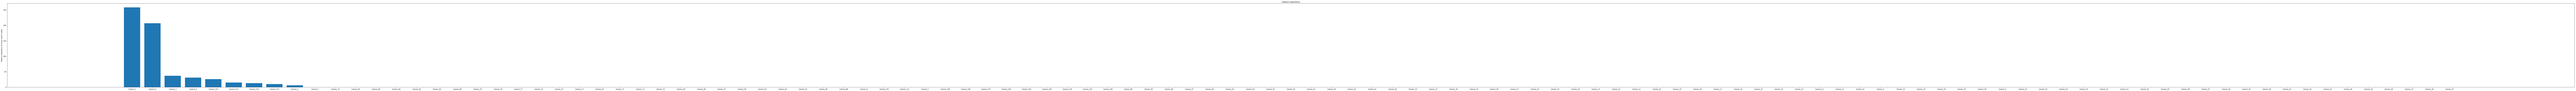

In [47]:
fig, axs = plt.subplots(figsize=[300, 10])
importances = pd.DataFrame({'features': gbm.feature_name(), 
                            'importance': gbm.feature_importance()}).sort_values('importance', ascending=False)
axs.bar(x=np.arange(len(importances)), height=importances['importance'])
axs.set_xticks(np.arange(len(importances)))
axs.set_xticklabels(importances['features'])
axs.set_ylabel('Feature importance (# times used to split)')
axs.set_title('Feature importance')

plt.show()

苗字ほとんど使われていなさそうだ。

In [48]:
preds01 = np.where(preds < 0.5, 0, 1)
print(preds01)

[0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 1
 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 1
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 0 1 1 1 1 0 0 1 0 0 0]


early  stopを用いた。これで評価してみる。

In [0]:
PassengerId = np.array(test["PassengerId"]).astype(int)
                            
my_solution = pd.DataFrame(preds01, PassengerId, columns = ["Survived"])
                            
my_solution.to_csv("FRY2_1.csv", index_label = ["PassengerId"])

In [0]:
from google.colab import files
files.download("FRY2_1.csv")

76%。悪くはないが良くない。